<a href="https://colab.research.google.com/github/AzlinRusnan/Machine-Learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification** in machine learning is a type of problem where the goal is to predict the category or class that an item belongs to, based on its features. For example, if you have emails, you might want to classify them as either "spam" or "not spam."

**Here's a simple breakdown:**

1. **Data with Labels:** You start with data where each item is labeled with the correct category. For instance, emails that are already marked as spam or not spam.

2. **Training:** You use this labeled data to teach a machine learning model to recognize patterns. This process is called training.

3. **Model:** The model learns from the training data to understand how the features (like words in the email) relate to the labels (spam or not spam).

4. **Prediction:** Once the model is trained, you can give it new, unlabeled data, and it will predict the category for each item. For example, it will classify new emails as either spam or not spam.

5. **Evaluation:** You check how well the model is doing by comparing its predictions to the actual labels on a set of test data. This helps you understand the accuracy of your model.

In summary, classification is about teaching a computer to automatically sort items into predefined categories based on example data.


---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
file_path = '/content/gdrive/MyDrive/STQD 6024 Machine Learning/default.csv'
default = pd.read_csv(file_path)
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


(-100.0, 2500.0)

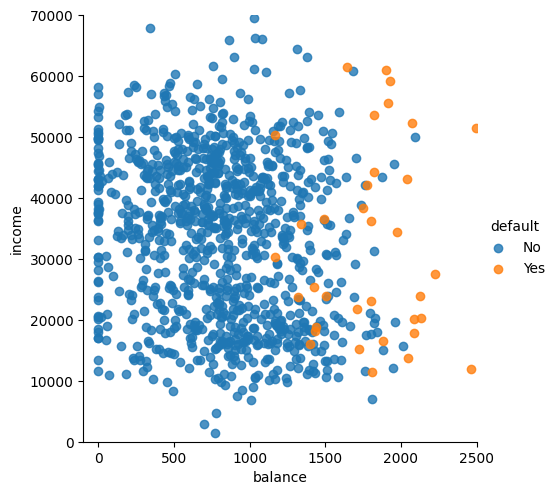

In [4]:
sns.lmplot(x='balance', y='income', data=default.sample(1000), hue='default', fit_reg=False)
plt.ylim([0,70000])
plt.xlim([-100,2500])

In summary, from this plot, it can be inferred that individuals with higher balances are more likely to default, while income does not have a clear correlation with the likelihood of defaulting.

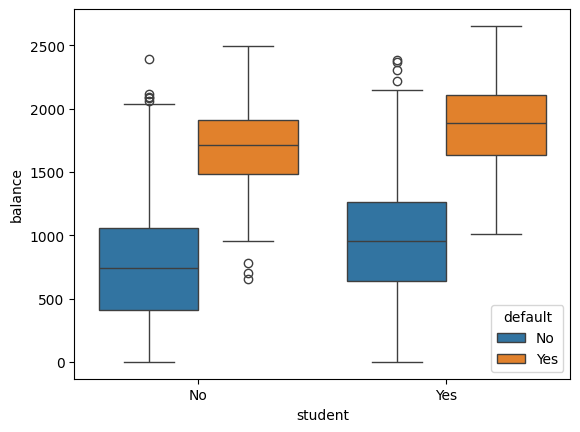

In [5]:
sns.boxplot(x='student', y='balance', data=default, hue='default');

In summary, individuals with higher balances are more likely to default, regardless of their student status. The balance is a significant factor in defaulting for both students and non-students.

## **Why not use linear regression for classification problems?**

Although we can assign numbers to categories (like 0 for 'No' and 1 for 'Yes'), there usually isn't a natural order or way to separate these categories that makes sense. Linear regression is designed to work with continuous numerical data, not categories.

Even in a simple case with just two categories (like 'Yes' and 'No'), using linear regression can lead to problems. It can give us predicted values that are not valid probabilities, meaning it might predict values less than 0 or greater than 1, which don't make sense for probabilities.

In [6]:
import statsmodels.formula.api as smf
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [7]:
# make column for Yes defaults
default['Yes'] = (default['default'] == 'Yes').astype(int)

In [19]:
default.tail()

,default,student,balance,income,Yes
9995,No,No,711.555020,52992.378914,0
9996,No,No,757.962918,19660.721768,0
9997,No,No,845.411989,58636.156984,0
9998,No,No,1569.009053,36669.112365,0
9999,No,Yes,200.922183,16862.952321,0


<Axes: xlabel='balance', ylabel='Yes'>

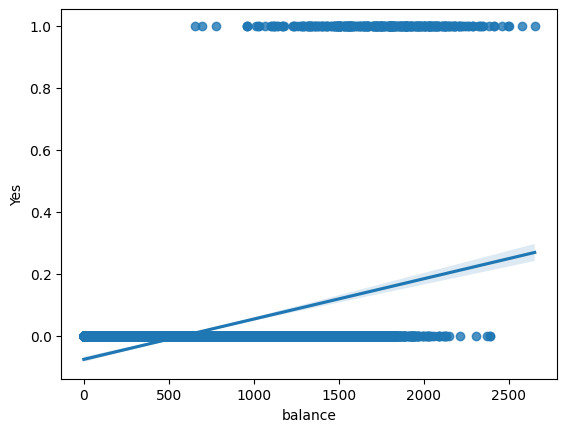

In [8]:
# linear regression model for default
# not ideal and could be made better by simply making all probabilites < 0 equal to 0
# and all probabilites > 1 equal to 1

sns.regplot(x='balance', y='Yes', data=default)

### **Logistic Regression**

**Purpose:**
Logistic regression is a method used to predict the probability of a certain class or event, such as "yes" or "no," based on one or more features. It ensures the output is always a number between 0 and 1, representing a probability.

**How It Works:**

- Function Choice: To make sure the output is always between 0 and 1, logistic regression uses a specific function called the logistic (or sigmoid) function.

- Probability Output: This function takes the input (a combination of your features) and transforms it into a probability. This probability tells you how likely it is that a certain event (like defaulting on a loan) will happen.

**Why Use It Instead of Linear Regression?:**

- Probabilities Between 0 and 1: Logistic regression is specifically designed to produce outputs between 0 and 1, which makes sense for probabilities. Linear regression, on the other hand, can produce values outside this range, which doesn't make sense for probabilities.

- Non-Linear Relationship: Logistic regression doesn't assume a straight-line relationship between the features and the outcome. Instead, it models a more complex relationship that fits the nature of probability.

**Example:**

- Imagine you're trying to predict whether someone will default on a loan based on their age. Logistic regression will take the age and use it to calculate the probability of default.

- If we find that increasing the age by one year changes the probability in a certain way, logistic regression will model this relationship accurately and ensure the probability stays within the 0 to 1 range.

In summary, logistic regression is a tool that predicts probabilities while ensuring the results make sense (i.e., they stay between 0 and 1) and models the relationship between features and the probability in a flexible way.


---



### **Estimating Coefficients in Logistic Regression**

**Linear Regression Recap:**

- In linear regression, we find the best-fitting line by minimizing the squared differences (residuals) between the observed values and the predicted values.

**Logistic Regression Approach:**

- Logistic regression works differently because it deals with probabilities.

**Maximum Likelihood Method:**

- Instead of minimizing residuals, logistic regression uses a method called "maximum likelihood" to find the best coefficients (parameters).

**How Maximum Likelihood Works:**

1. **Probability of Each Observation:**

- For each data point, the logistic regression model calculates the probability that the data point belongs to a certain class (like "default" or "no default").

2. **Multiplying Probabilities:**

- The method multiplies the probabilities of all data points together. This product represents how likely it is that the model's predictions match the actual data.

3. **Maximizing the Product:**

- The goal is to find the set of coefficients that make this product as large as possible. This means the model's predictions are as close to the actual data as they can be.

In [9]:
results = smf.logit('Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.4534
Time:                        02:44:49   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

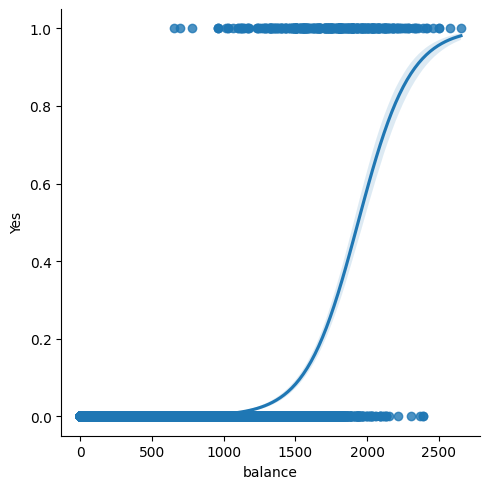

In [11]:
# Looks quite a bit different than the linear regression model
sns.lmplot(x='balance', y='Yes', data=default, logistic=True)

### **Scikit-learn for easier prediction**

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
# this actually uses regularization by default which will be covered in later chapters
lr = LogisticRegression()

In [14]:
X = np.column_stack((np.ones(len(default)), default['balance']))

In [15]:
X

array([[1.00000000e+00, 7.29526495e+02],
       [1.00000000e+00, 8.17180407e+02],
       [1.00000000e+00, 1.07354916e+03],
       ...,
       [1.00000000e+00, 8.45411989e+02],
       [1.00000000e+00, 1.56900905e+03],
       [1.00000000e+00, 2.00922183e+02]])

In [16]:
lr.fit(X, default['Yes'])

LogisticRegression()

In [20]:
# Model coefficients are different by B1 is very similar
lr.coef_

array([[-5.16481986,  0.00530575]])

In [21]:
# predict 1000 dollar balance default
lr.predict_proba([[1, 1000]]) # 99 percent chance no default

array([[0.99346413, 0.00653587]])

In [22]:
# predict 2000 dollar balance default
lr.predict_proba([[1, 2000]]) ## 55 percent chance default

array([[0.42999758, 0.57000242]])

In [23]:
# predict 3000 dollar balance default
lr.predict_proba([[1, 3000]]) ## >99 percent chance default

array([[0.00372998, 0.99627002]])

### **Multiple Linear Regression**
More than 1 predictor

In [24]:
results = smf.logit('Yes ~ balance + student', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.4619
Time:                        03:03:51   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Coefficients and Statistical Significance**
1. **Intercept:**

- Coefficient: -10.7495
- Standard Error: 0.369
- z-value: -29.115
- P>|z|: 0.000
- Confidence Interval (95%): [-11.473, -10.026]

Interpretation: The intercept is significantly different from zero (p < 0.05), indicating a strong baseline effect when other predictors are zero.

2. **Student (student[T.Yes]):**

- Coefficient: -0.7149
- Standard Error: 0.148
- z-value: -4.846
- P>|z|: 0.000
-Confidence Interval (95%): [-1.004, -0.426]

Interpretation: The coefficient for the student variable is significant (p < 0.05). Being a student decreases the log-odds of the dependent variable being Yes by 0.7149 units compared to non-students.

3. **Balance:**

- Coefficient: 0.0057
- Standard Error: 0.000
- z-value: 24.748
- P>|z|: 0.000
- Confidence Interval (95%): [0.005, 0.006]

Interpretation: The coefficient for balance is also significant (p < 0.05). For each unit increase in balance, the log-odds of the dependent variable being Yes increases by 0.0057 units. This suggests that higher balances are associated with a higher probability of the dependent variable being Yes.

**Overall Model Significance**

- The high Pseudo R-squared value (0.4619) indicates that the model explains a substantial proportion of the variability in the dependent variable.

- The very low p-value for the LLR test (1.189e-293) suggests that the model as a whole is statistically significant.

**Conclusion**

The logistic regression model indicates that both student status and balance significantly affect the likelihood of the dependent variable (Yes). Specifically, being a student decreases the likelihood, while a higher balance increases the likelihood. The model fits the data well, as indicated by the high Pseudo R-squared and the significant LLR test.

In [27]:
default['student_yes'] = (default['student'] == 'Yes').astype(int)
default

,default,student,balance,income,Yes,student_yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


In [28]:
X = np.column_stack((np.ones(len(default)), default['balance'], default['student_yes']))

In [29]:
X

array([[1.00000000e+00, 7.29526495e+02, 0.00000000e+00],
       [1.00000000e+00, 8.17180407e+02, 1.00000000e+00],
       [1.00000000e+00, 1.07354916e+03, 0.00000000e+00],
       ...,
       [1.00000000e+00, 8.45411989e+02, 0.00000000e+00],
       [1.00000000e+00, 1.56900905e+03, 0.00000000e+00],
       [1.00000000e+00, 2.00922183e+02, 1.00000000e+00]])

In [30]:
lr.coef_

array([[-5.16481986,  0.00530575]])

In [32]:
# predict 1000 dollar balance default
lr.predict_proba([[1, 2000, 1]]) # 99 percent chance no default

ValueError: X has 3 features, but LogisticRegression is expecting 2 features as input.

### **Simpsons Paradox**

Simpson's Paradox occurs when a trend that appears in different groups of data disappears or reverses when the groups are combined. Essentially, it means that the overall trend can be misleading if the data is not correctly segmented or if underlying factors are not considered. Here’s a simple example:

Imagine two doctors, Doctor A and Doctor B, treat patients for a condition. If you look at the success rates of each doctor separately for two different groups of patients, Doctor A might seem better for each group. But when you combine the data from both groups, Doctor B might have a higher overall success rate. This paradox happens because the groups have different sizes or other hidden variables affect the outcome.

In [33]:
results = smf.logit('Yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 May 2024   Pseudo R-squ.:                0.004097
Time:                        03:16:35   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

In summary, the logistic regression model suggests that being a student is associated with higher odds of the outcome 'Yes', and this association is statistically significant. The model fit is not very strong (as indicated by the low Pseudo R-squared), but the predictor (student) has a significant effect on the outcome.

Dr Aftar's:

The first model above with both balance and student show a negative relationship between student and default - meaning that being a student decreases the likelihood of defaulting. The second model shows the opposite, that being a student increases the chance at defaulting. This can be explained by the fact that students have more debt on average but compared to those with the same amount of debt they are less likely to default.

### **Linear Discriminant Analysis**

1. **Purpose:** LDA is used to classify things into different groups. For example, it might be used to determine whether an email is spam or not spam, based on the words it contains.

2. **How It Works:**

- Find the Differences: LDA looks at the features (like words in emails) and tries to find what differences best separate the classes (spam vs. not spam).
- Project Data: It then projects the data onto a new axis (a line) that maximizes the separation between the classes.
- Classification: After projecting, it can classify new data points by seeing which side of the line they fall on.

2. **Simple Example:** Imagine you have a basket of apples and oranges, and you want to separate them using their color and weight.

- Step 1: Measure the color and weight of each fruit.

- Step 2: LDA analyzes these measurements to find the best way to draw a line that separates the apples from the oranges.

- Step 3: When you get a new fruit, you measure its color and weight, plot it on your graph, and see which side of the line it falls on to decide if it's an apple or an orange.

In summary, LDA helps in finding the best boundary to separate different groups based on their features, making it easier to classify new observations into those groups.









In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

lda = LinearDiscriminantAnalysis() #This line creates an instance of the LDA model. Think of it as setting up a tool that will help us classify our data.
lda.fit(X, y) #This line trains (or fits) the LDA model using the data (X) and the labels (y). The model learns the relationship between the data points and their labels.

LinearDiscriminantAnalysis()

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y, lda.predict(X))

array([[3, 0],
       [0, 3]])

In [37]:
print(lda.predict([[-0.8, -1]]))

[1]


### **What is Confusion Matrix**

A confusion matrix is a table that helps us understand how well a classification model is performing by comparing the predicted labels (what the model thinks) with the actual labels (the true answers).

**Confusion matrix**

- LDA predicted that a total of 104 people would default.

- 81 actually defaulted and 23 did not.

- Only 23 out of 9667 of the individuals who did not default were incorrectly labeled

- However, of the 333 individuals who defaulted, 252 (or 75.7%) were missed by LDA.

- Even though the overall error rate is low, the error rate among individuals who defaulted is very high.

- Sensitivity is the percentage of true defaulters that are identified (81/333 = 24.3%).

- Specificity is the percentage of non-defaulters that are correctly identified (9644/9667 = 99.8%).

- LDA have a low sensitivity and high specificity. This is because LDA try to yield the smallest total error.

- This is because, Bayes classifier assign an observation to the class for which the posterior probability,  𝑝𝑘(𝑋)
  is greatest.